In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

# Exploratory data analysis

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Looks like a very ideal dataset<br>
All the values are numeric<br>
There are no null values to impute<br>
The platelets column needs scaling before applying ML algorithms, but lets find out if that feature actually matters<br>
Lets proceed to visualization<br>

<AxesSubplot:>

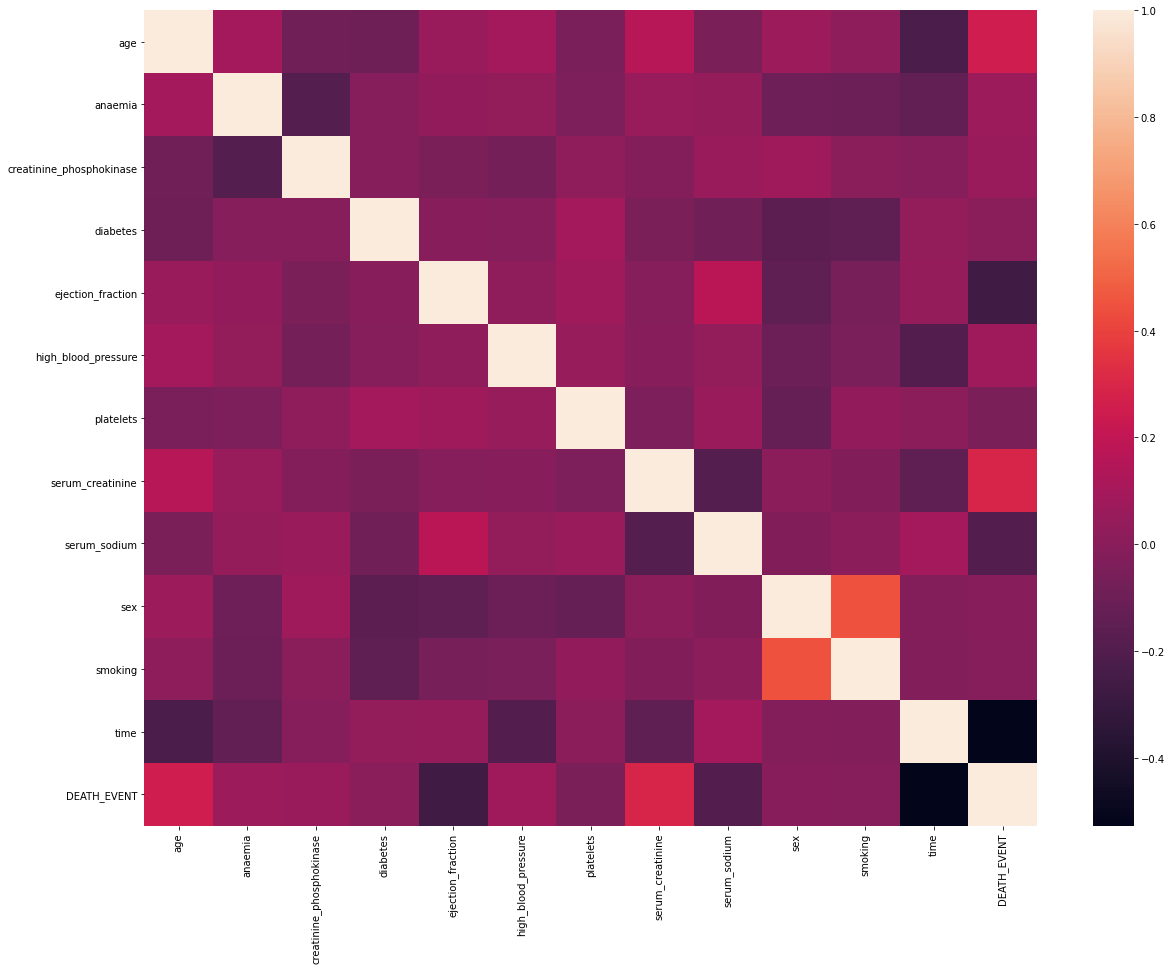

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

**Conclusions from the heatmap :**
* Death event looks to be highly correlated with serum_creatinine and age
* Survival event looks to be highly correlated with time, ejection_fraction, serum_sodium
* Sex and smoking have the least correlation with DEATH_EVENT, we can consider dropping these features

In [8]:
df.corr()['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

# Distplot of all the features
To understand how all the features are distributed

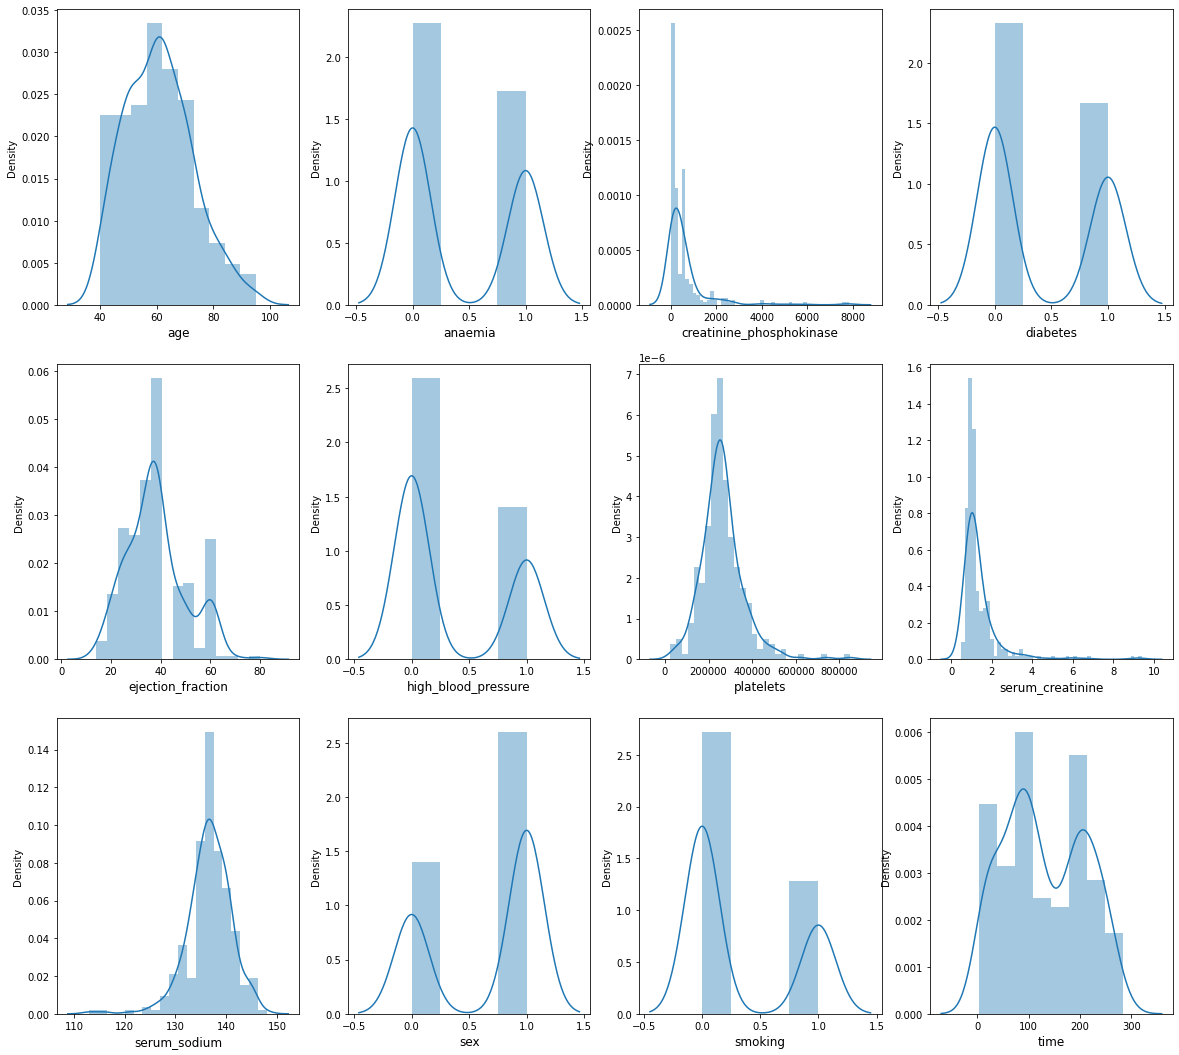

In [9]:
plt.figure(figsize = (20, 25))
feature_num = 1
for i in df:
    if feature_num < 13:
        ax = plt.subplot(4, 4, feature_num)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize = 12)
        
    feature_num += 1
plt.show()

**Inference from the distplot** :<br>
There is a notable skew in certain features like platelets, creatinine_phosphokinase <br>
We can overcome this using log transformation but will skip the same as these features have less impact on survival

In [10]:
df.shape

(299, 13)

# Scaling the features using Standard Scaler<br>
ML algorithms are very sensitive differences in scales of various features<br>
In this particular case the platelets feature has a huge magnitude when compared to other features<br>
This can considerably offset the accuracy of our results<br>
Hence scaling is necessary<br>

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
y = df['DEATH_EVENT']
df_scaled = ss.fit_transform(df.drop(('DEATH_EVENT'),axis=1))
df_scaled = pd.DataFrame(data=df_scaled,columns=df.columns[:-1])
df_scaled = pd.concat([df_scaled,y],axis=1)

In [12]:
df_scaled

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,1
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785,1
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,1
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451,0
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357,0
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697,0
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509,0


# Plot Boxplots to find outliers

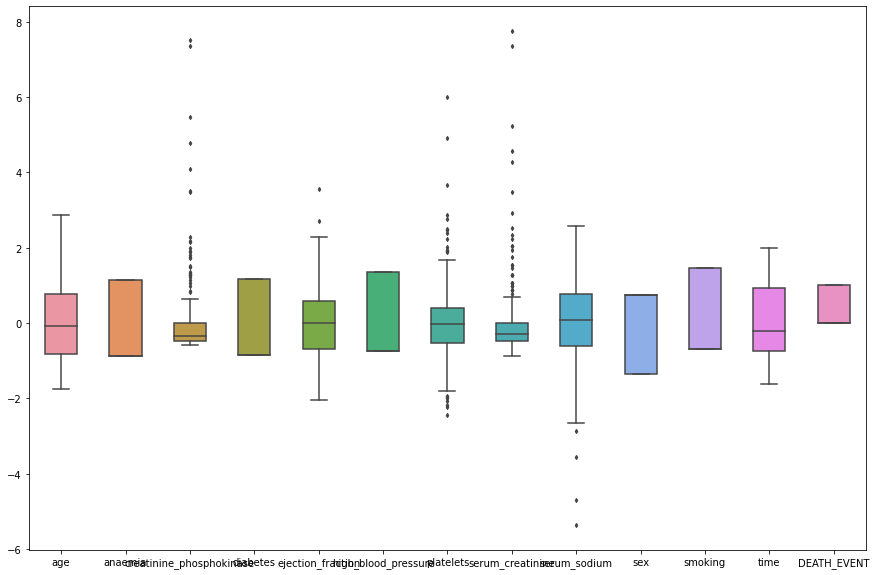

In [13]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = df_scaled, width = 0.5, ax = ax, fliersize = 3)
plt.show()

# Treating Outliers with Principal Component Analysis<br>
Principal component analysis can be used to find the features that explain the most of the variance(95-100%) in the dataset.<br>
Most of the times we do not need all the features in the input dataset to explain the variance.<br>

Hence this can be used to :<br>
1. Drop unwanted features <br>
2. Drop unwanted rows that act as outliers<br>

The inbuilt sklearn pca does not give us the top features(best features to use), the location of outliers in the dataset<br>
There is this cool library called pca that does both and hence we will be using the same.

In [14]:
pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=4515b5317750b4233c6af00338bbb2ad5f5f586913dd8b08e67559ece0d7f35c
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [15]:
from pca import pca
model = pca(n_feat=12,n_components=12) #considering all the 12 features as I do not want to eliminate columns
df_scaled_x = model.fit_transform(df_scaled.drop(('DEATH_EVENT'),axis=1))


[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [16]:
df_scaled_x['topfeat']

,PC,feature,loading,type
0,PC1,sex,0.622376,best
1,PC2,time,-0.510580,best
2,PC3,serum_sodium,-0.625528,best
3,PC4,platelets,0.508584,best
4,PC5,creatinine_phosphokinase,0.510700,best
5,PC6,platelets,0.522382,best
6,PC7,anaemia,0.615947,best
7,PC8,diabetes,-0.675612,best
8,PC9,age,-0.655096,best
9,PC10,serum_sodium,0.541121,best


In [17]:
outliers = df_scaled_x['outliers']
outliers_ = outliers[outliers['y_bool_spe']==True]

In [18]:
outliers_.reset_index(inplace=True)

In [19]:
outliers_index = outliers_['index']

In [20]:
outliers_index #gives the index of the outliers in the dataset

0       2
1       4
2       5
3       9
4      10
5      21
6      26
7      28
8      37
9      48
10     53
11     55
12     60
13     65
14     72
15     83
16    103
17    116
18    117
19    118
20    134
21    171
22    217
23    248
24    266
25    268
26    287
27    290
28    296
29    297
Name: index, dtype: int64

Let us plot the pca model<br>
All the points outside the green zone gives us the outliers

<Figure size 1440x720 with 0 Axes>

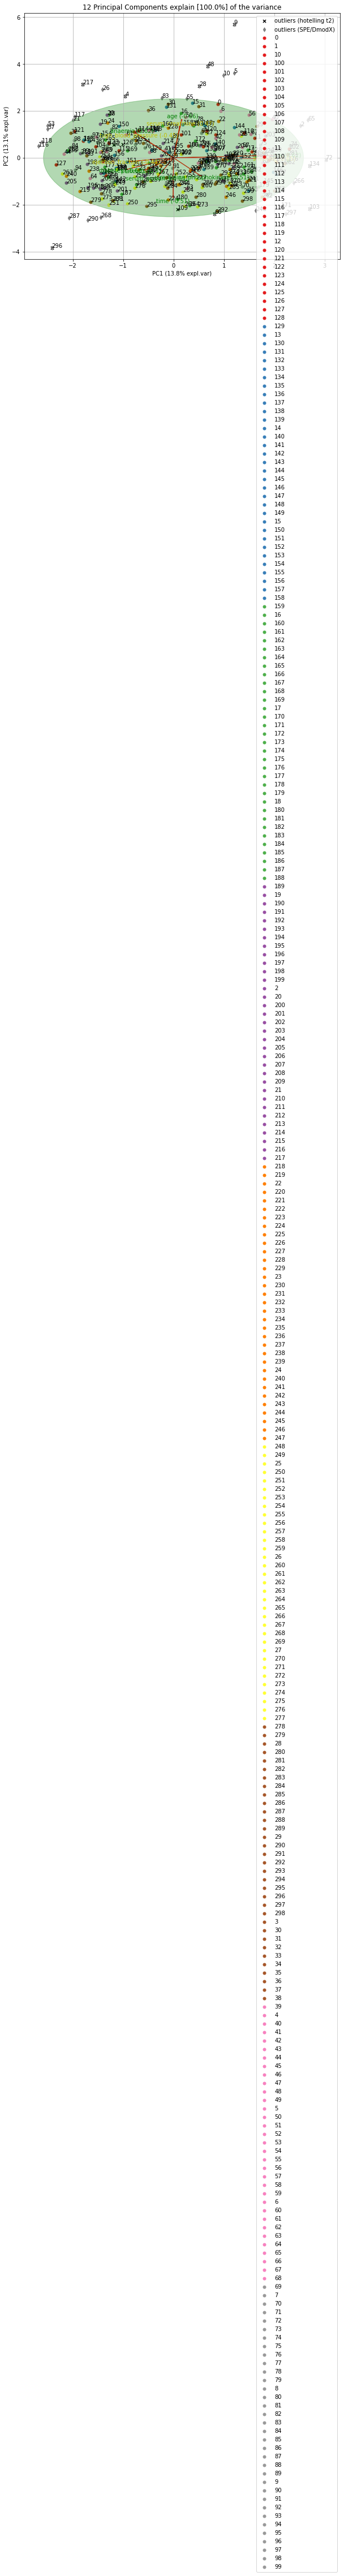

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'12 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (13.8% expl.var)', ylabel='PC2 (13.1% expl.var)'>)

In [21]:
plt.figure(figsize=(20,10))
model.biplot(legend=True, SPE=True, hotellingt2=True)

Let us drop the outliers

In [22]:
df_new = df_scaled.drop(outliers_index,axis=0)

In [23]:
df_new

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,1
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,1
6,1.192945,1.147968,-0.346704,-0.847579,-1.953749,-0.735688,-1.396531e+00,-0.187726,0.085034,0.735688,-0.687682,-1.552067,1
7,-0.070223,1.147968,-0.275472,1.179830,1.854958,-0.735688,1.952488e+00,-0.284552,-1.277026,0.735688,1.454161,-1.552067,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-0.743913,-0.871105,-0.404515,1.179830,-0.007077,-0.735688,1.215089e+00,-0.381379,0.766064,0.735688,1.454161,1.648581,0
293,0.182411,1.147968,-0.494330,1.179830,-0.260991,-0.735688,-8.639651e-01,-0.478205,-0.141976,0.735688,1.454161,1.803451,0
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451,0
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357,0


Let us see if there are some more outliers in the dataset after PCA

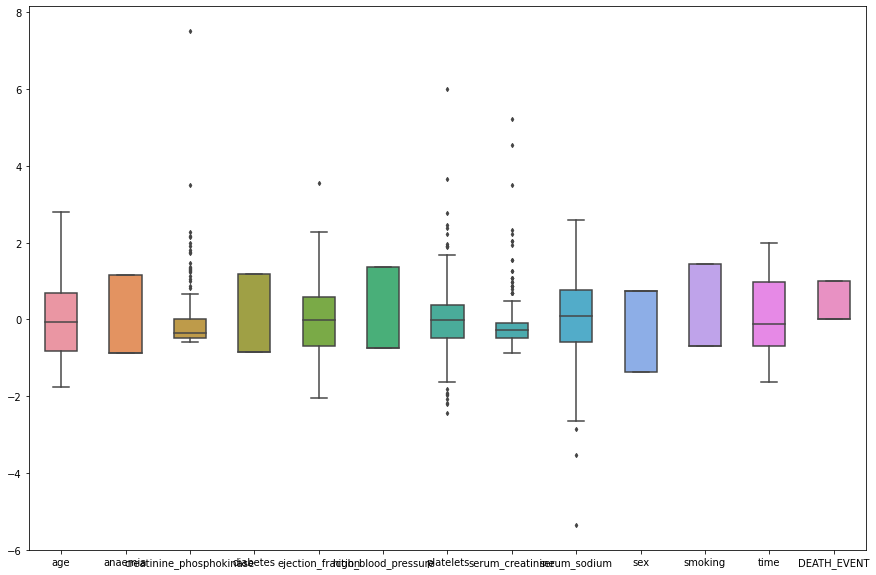

In [24]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = df_new, width = 0.5, ax = ax, fliersize = 3)
plt.show()

Looks like there are some more outliers and we have to clean them up

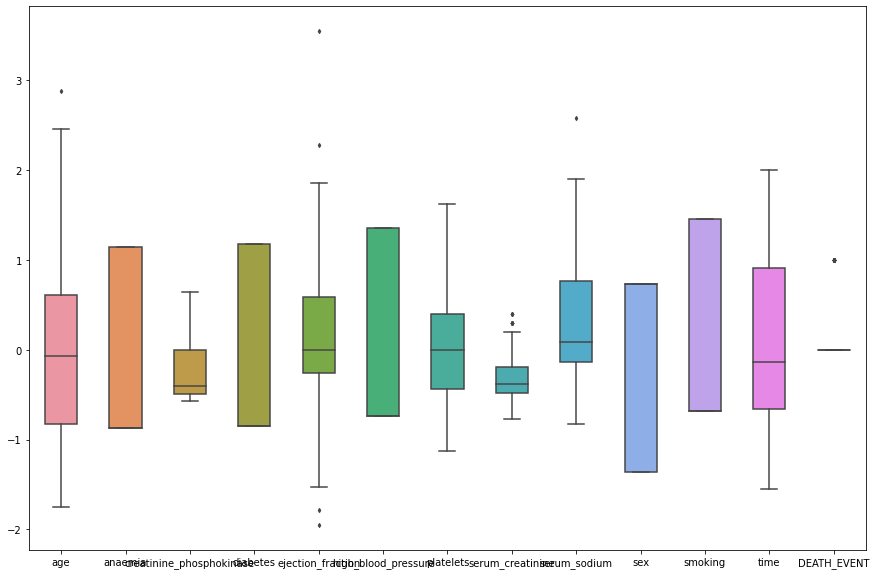

In [25]:
df_exp = df_scaled[df_scaled['platelets'] < df_scaled['platelets'].quantile(0.95)]
df_exp = df_exp[df_exp['platelets'] > df_exp['platelets'].quantile(.1)]
df_exp = df_exp[df_exp['serum_sodium'] > df_exp['serum_sodium'].quantile(.1)]
df_exp = df_exp[df_exp['serum_creatinine'] < df_exp['serum_creatinine'].quantile(0.9)]
df_exp = df_exp[df_exp['creatinine_phosphokinase'] < df_exp['creatinine_phosphokinase'].quantile(0.91)]
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = df_exp, width = 0.5, ax = ax, fliersize = 3)
plt.show()

We have cleaned up most of the outliers, do not want to drop more samples as it may reduce the amount of data input<br>
to ML algorithms for classification

In [26]:
df_exp.shape

(177, 13)

In [27]:
df_exp['DEATH_EVENT'].value_counts()

0    138
1     39
Name: DEATH_EVENT, dtype: int64

# Test train split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(('DEATH_EVENT'),axis=1), df_exp['DEATH_EVENT'], test_size=0.3, random_state=42,stratify=df_exp['DEATH_EVENT'])

In [30]:
y_train.value_counts()

0    96
1    27
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

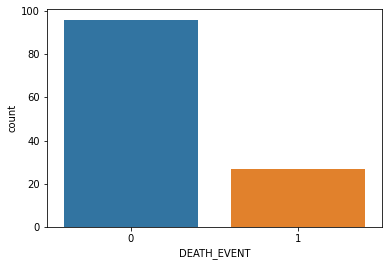

In [31]:
sns.countplot(y_train)

The output labels are imbalanced and we have overcome this via oversampling in order to avoid model bias towards majority class

# Oversampling with SMOTE

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy={0:150,1:150})
X,y = sm.fit_resample(X_train,y_train)

# Choosing the best model based on F1-score

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, balanced_accuracy_score
from sklearn.model_selection import KFold
models=[("XGboost", XGBClassifier()),
        ("Stochastic Gradient Descent", SGDClassifier()),
        ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
        ("Decision Tree", DecisionTreeClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ("Extra Trees", ExtraTreesClassifier()),
        ("Gradient Boosting", GradientBoostingClassifier()),
        ("KNeighbors", KNeighborsClassifier()),
        ("SVM", SVC()),
        ("Naive Bayes", GaussianNB()),
        ("Cat Boost", CatBoostClassifier(verbose=False)),
        ("Ada Boost", AdaBoostClassifier())]

f1 = []
variance = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    results = cross_val_score(model, X, y, cv=kfold, scoring='f1')
    f1.append(results.mean())
    variance.append(results.std())
    names.append(name)
    print('Model name : {}, F1 score : {},  variance : {}'.format(name,results.mean(),results.std()))

f1 = pd.Series(data=f1,name='f1-score')
variance = pd.Series(data=variance,name='variance')
names = pd.Series(data=names,name='names')
df_f1 = pd.concat([f1,variance],axis=1)

df_f1.set_index(keys=names,inplace=True)

[12:01:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:01:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:01:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:01:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [34]:
df_f1.sort_values('f1-score',ascending=False,inplace=True)

<AxesSubplot:xlabel='f1-score', ylabel='names'>

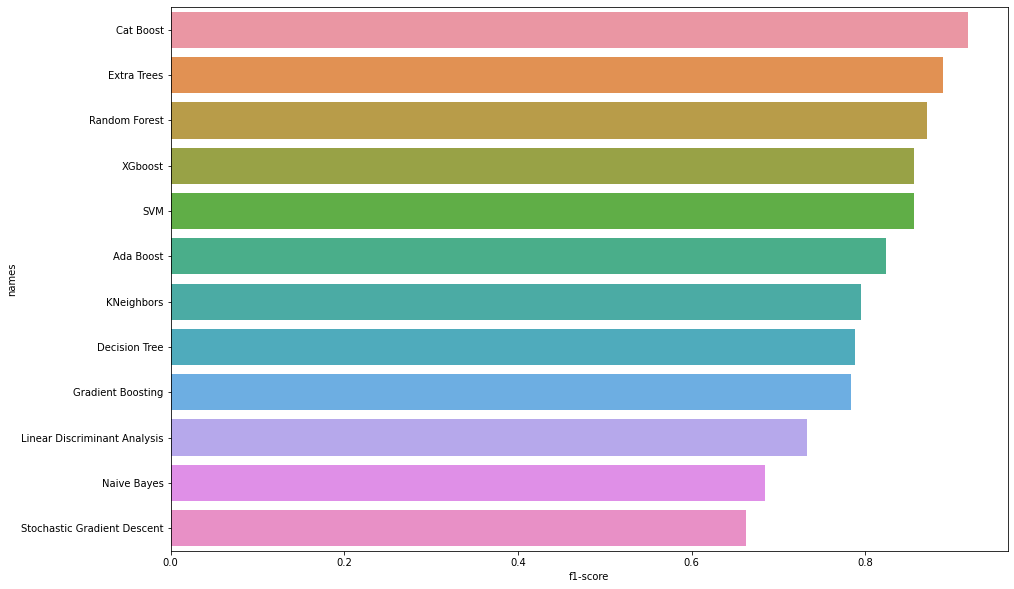

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(y=df_f1.index,x=df_f1['f1-score'])

We will use **Cat boost , Extra trees, Random forests** as they seem to have the best F1-scores

# Feature Selection
Let us use extra trees to do some feature selection and eliminate unwanted features to boost model accuracy

[[40  5]
 [ 2  7]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        45
           1       0.58      0.78      0.67         9

    accuracy                           0.87        54
   macro avg       0.77      0.83      0.79        54
weighted avg       0.89      0.87      0.88        54



<AxesSubplot:>

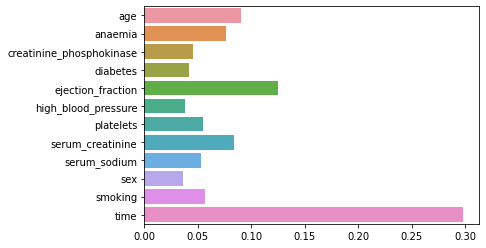

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
ext = ExtraTreesClassifier(criterion='entropy', max_depth=8)
ext.fit(X,y)
pred_ext = ext.predict(X_test)
print(confusion_matrix(pred_ext,y_test))
print(classification_report(pred_ext,y_test))
sns.barplot(x=ext.feature_importances_,y=X_test.columns)

The most important features are **age, ejection_fraction, serum_creatinine,time**<br>
We will be dropping all the other features

In [37]:
X.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [38]:
X.drop(['anaemia', 'creatinine_phosphokinase', 'diabetes',
        'high_blood_pressure', 'platelets','serum_sodium', 'sex', 'smoking'],inplace=True,axis=1)
X_test.drop(['anaemia', 'creatinine_phosphokinase', 'diabetes',
        'high_blood_pressure', 'platelets','serum_sodium', 'sex', 'smoking'],inplace=True,axis=1)

In [39]:
print(X.shape,X_test.shape,y.shape,y_test.shape)

(300, 4) (54, 4) (300,) (54,)


# Hyper parameter tuning for Extra trees classifier

In [40]:
from sklearn.model_selection import GridSearchCV
params_ext = [{'criterion' : ["gini", "entropy"],
              'min_samples_split': [2,4,6,8], 
              'max_depth': [2,4,6,8],
              'max_features' : ["auto", "sqrt", "log2"],
              'n_estimators': [100,200,400,600],
          }]
classifier_ = ExtraTreesClassifier()
grid_search_ext = GridSearchCV(classifier_,params_ext,cv=3,n_jobs=150,scoring='f1',verbose=10)
grid_search_ext.fit(X,y)
print(grid_search_ext.best_params_)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}


In [41]:
grid_search_ext.best_estimator_

ExtraTreesClassifier(max_depth=8, max_features='sqrt', min_samples_split=4)

# Prediction using Extra trees

In [42]:
ext = ExtraTreesClassifier(max_depth=8, max_features='sqrt', min_samples_split=4)
ext.fit(X,y)
pred_ext = ext.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(pred_ext,y_test))
print(classification_report(pred_ext,y_test))

[[38  3]
 [ 4  9]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.75      0.69      0.72        13

    accuracy                           0.87        54
   macro avg       0.83      0.81      0.82        54
weighted avg       0.87      0.87      0.87        54



# Hyper parameter tuning for random forests

In [44]:
from sklearn.ensemble import RandomForestClassifier
params_rfc = [{'criterion' : ["gini", "entropy"],
              'min_samples_split': [2,4,6,8], 
              'max_depth': [2,4,6,8],
              'max_features' : ["auto", "sqrt", "log2"],
              'n_estimators': [100,200,400,600],
          }]
classifier_ = RandomForestClassifier()
grid_search_rfc = GridSearchCV(classifier_,params_rfc,cv=3,n_jobs=150,scoring='f1',verbose=10)
grid_search_rfc.fit(X,y)
print(grid_search_rfc.best_params_)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}


In [45]:
grid_search_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8)

In [49]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=8)
rfc.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=8)

# Prediction using random forests

In [50]:
pred_rfc = rfc.predict(X_test)

In [51]:
print(confusion_matrix(pred_rfc,y_test))
print(classification_report(pred_rfc,y_test))

[[39  4]
 [ 3  8]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.67      0.73      0.70        11

    accuracy                           0.87        54
   macro avg       0.80      0.82      0.81        54
weighted avg       0.88      0.87      0.87        54



# Training the Cat Boost Classifier

In [53]:
cat = CatBoostClassifier(verbose=False)
cat.fit(X,y)

# Prediction using cat boost

In [54]:
pred_cat = cat.predict(X_test)

In [55]:
print(confusion_matrix(pred_cat,y_test))
print(classification_report(pred_cat,y_test))

[[38  3]
 [ 4  9]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.75      0.69      0.72        13

    accuracy                           0.87        54
   macro avg       0.83      0.81      0.82        54
weighted avg       0.87      0.87      0.87        54



# Conclusion

So the best model to use would be **Extra trees and cat boost** , because they both have an **F1-score of 0.82** <br>
And also an **accuracy of 0.87**

**Please upvote if this notebook was helpful and if you liked it<br>
Comments for improvements are welcome**